In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [2]:
Dataset = pd.read_csv(r'C:\Users\gvi7cob\Documents\AI\BodyFat_Prediction\BodyFatDataFeatureEngineered_VIF.csv')

In [3]:
Dataset.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
#test train splitter
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(Dataset, test_size=0.1, random_state=0)

In [5]:
trainset.shape,testset.shape

((226, 4), (26, 4))

In [6]:
trainset.head()

,Density,BodyFat,Age,Chest
8,1.0900,4.1,25,100.9
55,1.0473,22.6,54,107.6
196,1.0488,22.0,42,97.8
37,1.0346,28.4,50,105.6
246,1.0308,30.2,69,113.7


X_y Split

In [7]:
# Dependant and Independant Variable Split
# Since Density is tough to calculate we will try to develop a model with Density and predict BodayFat
def X_y_Split(df):
    y = df['BodyFat']
    X = df.drop(['BodyFat'], axis = 1)
    return X,y

Normalize the Feature scale with Standard scalar. 

In [8]:
#Mean and Standard Deviation calculated on Trainingset only
class scalartransform:
    def __init__(self):
        self.mean = {}
        self.std = {}
    def fit(self,trainset):
        for feature in trainset:
            self.mean[feature] = trainset[feature].mean()
            self.std[feature] = trainset[feature].std()
    def transform(self, dataset):
        Data = dataset.copy()
        for feature in self.mean:
            Data[feature] = (dataset[feature] - self.mean[feature])/self.std[feature]
        return Data
    def RevertScaling(self,df):
        Data = df.copy()
        for feature in self.mean:
            Data[feature] = df[feature]*self.std[feature] + self.mean[feature]
        return Data

Data Preprocessor Function

In [9]:
X_train, y_train = X_y_Split(trainset)

scaler = scalartransform()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [10]:
X_train.head()

,Density,Age,Chest
8,1.798602,-1.585797,-0.000309
55,-0.427551,0.724341,0.779738
196,-0.349349,-0.231578,-0.361226
37,-1.089662,0.405702,0.546888
246,-1.287774,1.919241,1.489931


In [11]:
#Mean Square Error Between Prediction and Actual
def mse(y_pred,y_act):
    return sum(((y_pred - y_act)**2))/len(y_act)

In [12]:
class AdjRidgeRegres(Ridge):
    def __init__(self,alpha):
        super().__init__(alpha=alpha)
        
    def predict(self,X):
        y_pred = super().predict(X)
        y_pred = [max(x,0) for x in y_pred]
        return y_pred

Choosing the value of Regularization using Cross Validation

In [13]:
alpha = [float(x/1000) for x in np.linspace(start = 10, stop = 5000, num = 50)]

In [14]:
parameter_grid = {'alpha': alpha}

In [15]:
import sklearn.metrics
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [16]:
from sklearn.model_selection import GridSearchCV
regr = AdjRidgeRegres(alpha = 10)
grid_lin_regressor = GridSearchCV(estimator = regr,
                                  param_grid = parameter_grid,
                                  scoring='explained_variance',
                                  cv=5,
                                  verbose=4)

grid_lin_regressor.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........................alpha=0.01;, score=0.996 total time=   0.0s
[CV 2/5] END ........................alpha=0.01;, score=0.987 total time=   0.0s
[CV 3/5] END ........................alpha=0.01;, score=0.873 total time=   0.0s
[CV 4/5] END ........................alpha=0.01;, score=0.996 total time=   0.0s
[CV 5/5] END ........................alpha=0.01;, score=0.976 total time=   0.0s
[CV 1/5] END .........alpha=0.11183673469387755;, score=0.996 total time=   0.0s
[CV 2/5] END .........alpha=0.11183673469387755;, score=0.987 total time=   0.0s
[CV 3/5] END .........alpha=0.11183673469387755;, score=0.873 total time=   0.0s
[CV 4/5] END .........alpha=0.11183673469387755;, score=0.996 total time=   0.0s
[CV 5/5] END .........alpha=0.11183673469387755;, score=0.976 total time=   0.0s
[CV 1/5] END .........alpha=0.21367346938775508;, score=0.996 total time=   0.0s
[CV 2/5] END .........alpha=0.21367346938775508

[CV 1/5] END ...........alpha=2.861428571428571;, score=0.995 total time=   0.0s
[CV 2/5] END ...........alpha=2.861428571428571;, score=0.983 total time=   0.0s
[CV 3/5] END ...........alpha=2.861428571428571;, score=0.884 total time=   0.0s
[CV 4/5] END ...........alpha=2.861428571428571;, score=0.994 total time=   0.0s
[CV 5/5] END ...........alpha=2.861428571428571;, score=0.975 total time=   0.0s
[CV 1/5] END ..........alpha=2.9632653061224485;, score=0.995 total time=   0.0s
[CV 2/5] END ..........alpha=2.9632653061224485;, score=0.983 total time=   0.0s
[CV 3/5] END ..........alpha=2.9632653061224485;, score=0.885 total time=   0.0s
[CV 4/5] END ..........alpha=2.9632653061224485;, score=0.993 total time=   0.0s
[CV 5/5] END ..........alpha=2.9632653061224485;, score=0.975 total time=   0.0s
[CV 1/5] END ..........alpha=3.0651020408163263;, score=0.995 total time=   0.0s
[CV 2/5] END ..........alpha=3.0651020408163263;, score=0.982 total time=   0.0s
[CV 3/5] END ..........alpha

GridSearchCV(cv=5, estimator=AdjRidgeRegres(alpha=10),
             param_grid={'alpha': [0.01, 0.11183673469387755,
                                   0.21367346938775508, 0.31551020408163266,
                                   0.41734693877551016, 0.5191836734693878,
                                   0.6210204081632653, 0.7228571428571428,
                                   0.8246938775510204, 0.926530612244898,
                                   1.0283673469387755, 1.130204081632653,
                                   1.2320408163265306, 1.3338775510204082,
                                   1.4357142857142855, 1.537551020408163,
                                   1.6393877551020408, 1.7412244897959184,
                                   1.843061224489796, 1.9448979591836733,
                                   2.046734693877551, 2.1485714285714286,
                                   2.250408163265306, 2.3522448979591837,
                                   2.454081632653061, 2.55591

In [17]:
grid_lin_regressor.best_params_

{'alpha': 3.5742857142857143}

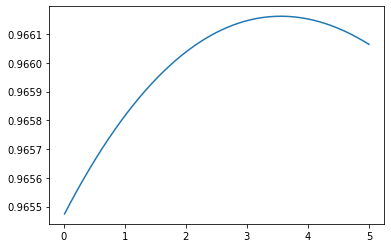

In [18]:
plt.plot(list(grid_lin_regressor.cv_results_['param_alpha']),list(grid_lin_regressor.cv_results_['mean_test_score']))

In [19]:
print(grid_lin_regressor.cv_results_)

{'mean_fit_time': array([0.0099606 , 0.00729799, 0.01113949, 0.01118374, 0.01181154,
       0.01026168, 0.01135063, 0.01352854, 0.01481919, 0.01094131,
       0.00713911, 0.01056681, 0.01138563, 0.00852427, 0.00912714,
       0.00396547, 0.00278697, 0.00223494, 0.00271068, 0.00220947,
       0.00283232, 0.00271316, 0.00256314, 0.00219316, 0.0024291 ,
       0.00261955, 0.00224299, 0.00257092, 0.00253153, 0.00237951,
       0.00339952, 0.00319057, 0.00297542, 0.00276947, 0.00318818,
       0.0030005 , 0.00318465, 0.00356398, 0.00331693, 0.00277758,
       0.00219612, 0.00256271, 0.00253897, 0.00259686, 0.00218668,
       0.00232677, 0.00218573, 0.00241036, 0.00257778, 0.0031899 ]), 'std_fit_time': array([0.0065374 , 0.00159361, 0.00488572, 0.0007585 , 0.00149796,
       0.00099062, 0.00054108, 0.00078219, 0.00101554, 0.00088266,
       0.0007064 , 0.00275496, 0.00142545, 0.00082279, 0.00064956,
       0.00206679, 0.00074497, 0.00039362, 0.00048027, 0.00039204,
       0.00042527, 0.00058

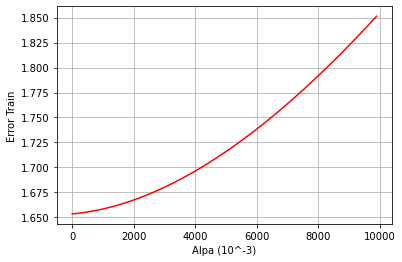

In [20]:
error_train = []

Alpha = range(0,10000,100)
for a in Alpha:
    regr = AdjRidgeRegres(alpha = a/1000)
    regr.fit(X_train, y_train)
    y_train_pred = regr.predict(X_train)
    e = mse(y_train_pred,y_train)
    error_train.append(e)

plt.figure
plt.plot(Alpha,error_train, color='red')
plt.xlabel('Alpa (10^-3)')
plt.ylabel('Error Train')
plt.grid()
plt.show()

In [21]:
regr = AdjRidgeRegres(alpha = 3.5742857142857143)
regr.fit(X_train, y_train)

print('Regression R^2 Value :',regr.score(X_train, y_train))

y_train_pred = regr.predict(X_train)

Regression R^2 Value : 0.9761428808246737


In [22]:
e = mse(y_train_pred,y_train)
print( "error=", e, end='\n')

error= 1.6890446198378826


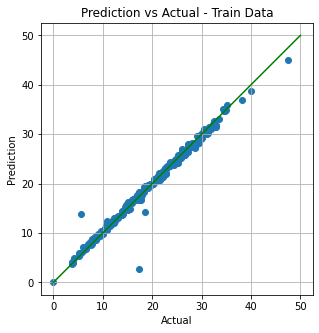

In [23]:
# plot predictions vs actual
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.scatter(x=y_train,y=y_train_pred)
ax.plot([0,50],[0,50], color='green')
ax.set_aspect(1)
plt.grid()
plt.title('Prediction vs Actual - Train Data')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

In [24]:
data = {'Feature': X_train.columns,
       'Coefficient':regr.coef_}
print(pd.DataFrame(data),'\n\n''Intercept:',regr.intercept_)

   Feature  Coefficient
0  Density    -7.721075
1      Age     0.199525
2    Chest     0.625737 

Intercept: 19.1898230088495


Predict the value in the test set

In [25]:
X_test, y_test = X_y_Split(testset)

X_test = scaler.transform(X_test)

In [26]:
y_test_pred = regr.predict(X_test)
print('Regression R^2 Value :',regr.score(X_test, y_test))

e = mse(y_test_pred,y_test)
print( "error=", e, end='\n')

Regression R^2 Value : 0.9966821070102583
error= 0.20101665727756052


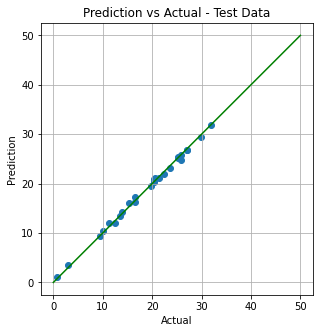

In [27]:
# plot predictions vs actual
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.scatter(x=y_test,y=y_test_pred)
ax.plot([0,50],[0,50], color='green')
ax.set_aspect(1)
plt.grid()
plt.title('Prediction vs Actual - Test Data')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

# Visualization of the Result / Error

In [28]:
y = pd.concat([y_train, y_test], axis=0)
y_pred = np.concatenate((y_train_pred,y_test_pred),axis=0)
X = pd.read_csv(r'C:\Users\gvi7cob\Documents\AI\BodyFat_Prediction\bodyfat.csv')
X.drop(['BodyFat'],axis=1,inplace=True)
#X = pd.concat([X_train, X_test], axis=0)

In [29]:
Feature_error = y - y_pred

In [30]:
ReFeature = X.copy()
ReFeature['Feature_error']=Feature_error
ReFeature = pd.concat([ReFeature, y], axis=1)

In [31]:
features = ReFeature.columns
features

Index(['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip',
       'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'Feature_error',
       'BodyFat'],
      dtype='object')

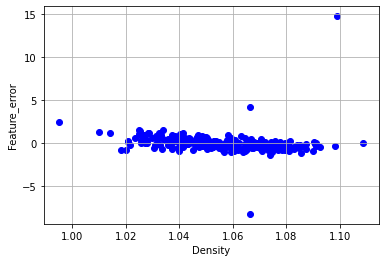

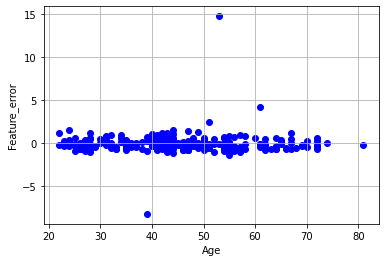

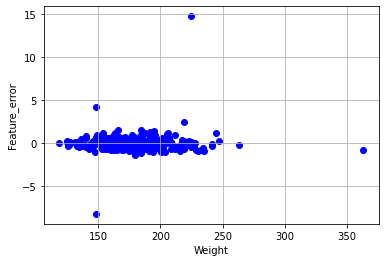

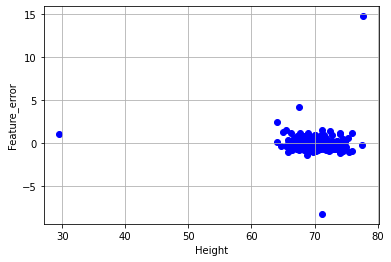

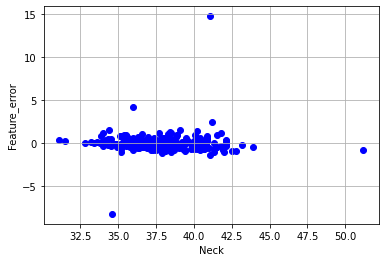

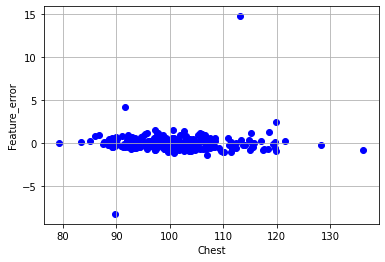

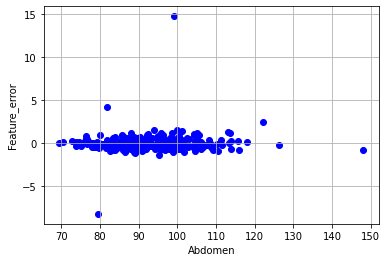

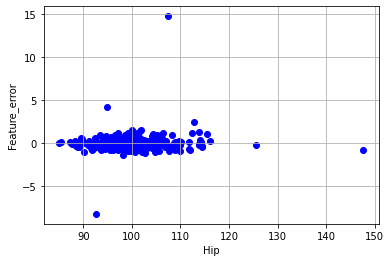

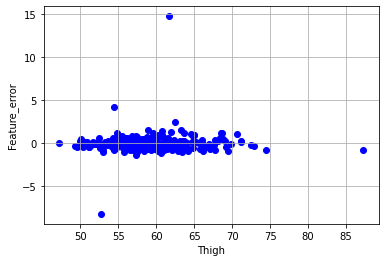

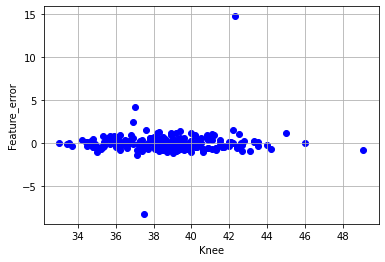

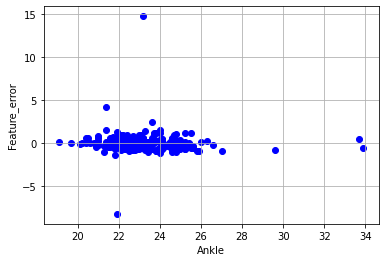

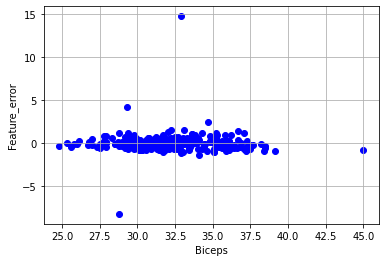

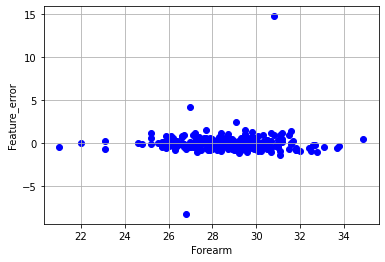

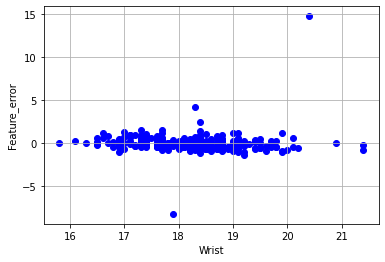

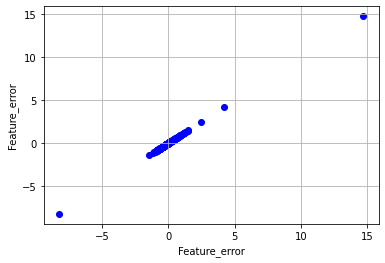

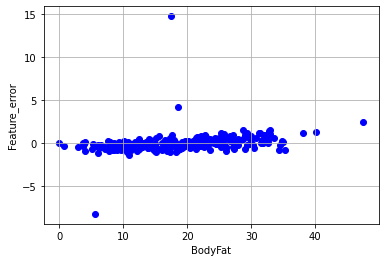

In [32]:
for feature in features:
    plt.figure
    plt.scatter(ReFeature[feature],ReFeature['Feature_error'], color='blue')
    plt.ylabel('Feature_error')
    plt.xlabel(feature)
    plt.grid()
    plt.show()

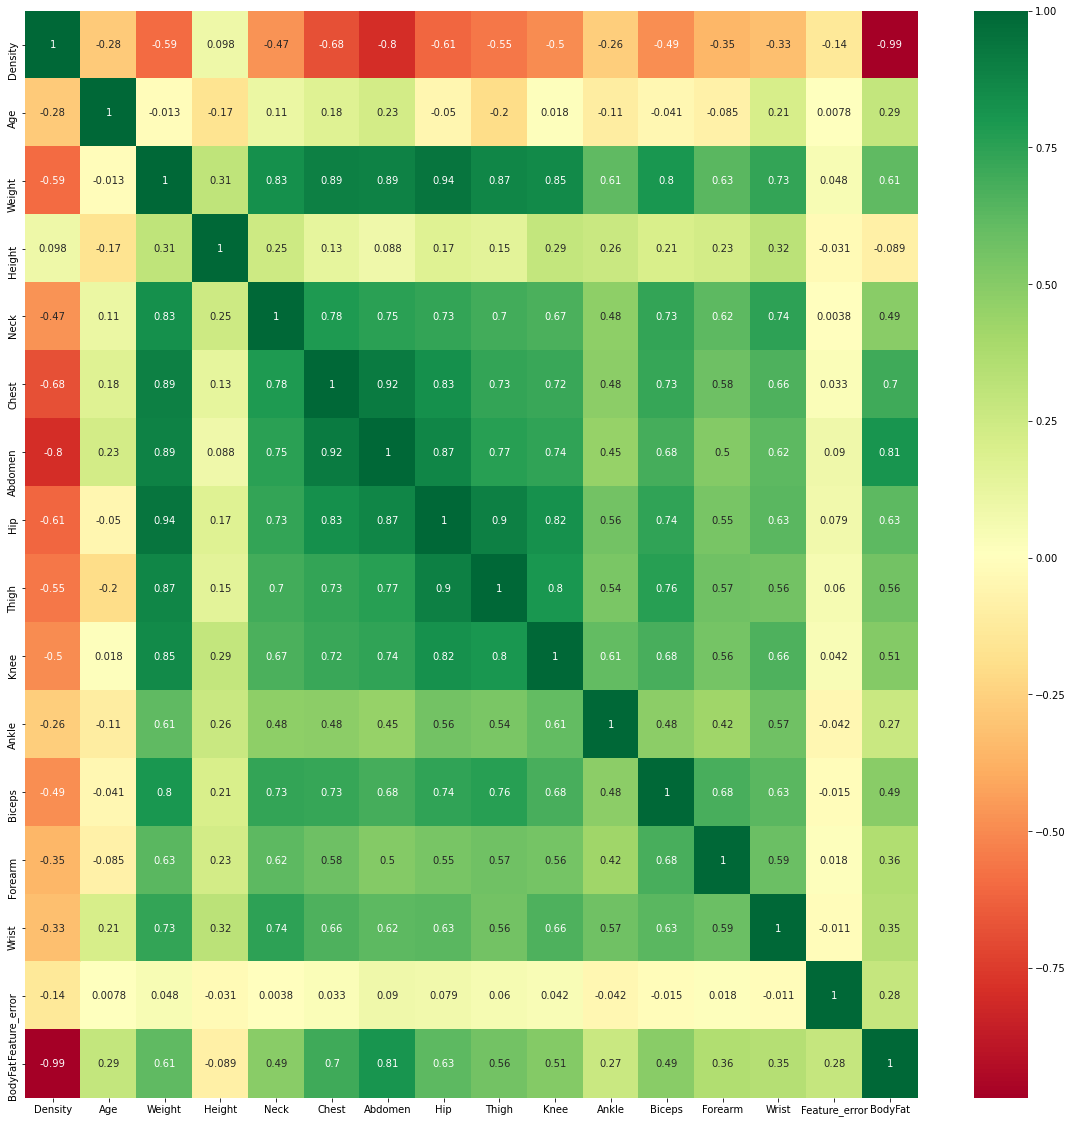

In [33]:
import seaborn as sns
corrmat = ReFeature.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(ReFeature[top_corr_features].corr(),annot=True,cmap="RdYlGn")

There is very less correlation between Error and Other Features as well. So We cant improve the model with any other feature

In [34]:
features = features[features!='Feature_error']
features = features[features!='BodyFat']

C:\Users\gvi7cob\.conda\envs\Regressor\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BodyFat', ylabel='Density'>

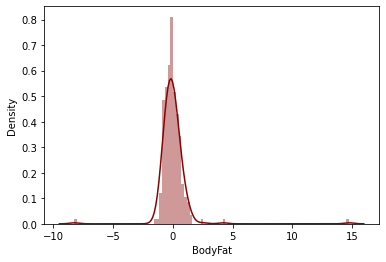

In [35]:
sns.distplot((y - y_pred),kde=True,color= 'darkred',bins=100)

We have a Normal Distribution of Prediciton Error

In [36]:
ReFeature.Feature_error.abs() >= 1.5

0      False
1      False
2      False
3      False
4      False
       ...  
247    False
248    False
249    False
250    False
251    False
Name: Feature_error, Length: 252, dtype: bool

In [37]:
HigherErrorSample = ReFeature[ReFeature.Feature_error.abs() >= 1.5]

Calculating the actual value from mean and standard deviation

In [38]:
pd.set_option("display.max_columns", None)

In [39]:
HigherErrorSample

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Feature_error,BodyFat
47,1.0665,39,148.50,71.25,34.6,89.8,79.5,92.7,52.7,37.5,21.9,28.8,26.8,17.9,-8.259548,5.6
75,1.0666,61,148.25,67.50,36.0,91.6,81.8,94.8,54.5,37.0,21.4,29.3,27.0,18.3,4.199900,18.5
95,1.0991,53,224.50,77.75,41.1,113.2,99.2,107.5,61.7,42.3,23.2,32.9,30.8,20.4,14.735890,17.4
215,0.9950,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,2.482839,47.5


47 : Density to BodyFat relation is not as expected by model. BodyFat 5.6 corresponding Density should be greater 1.09. But this is 1.075. Similar is the case for 75, 95 BodyFat is relation to Density value differing. 

215 : Density Value is very low. Almost an outlier 

# Pickling

In [40]:
from pickle import dump,load

In [41]:
# save the model
dump(regr, open('model_linReg.pkl', 'wb'))
# save the scaler
dump(scaler, open('scaler_linReg.pkl', 'wb'))

Checking if the pickled object file is working as expected

In [42]:
Dataset_pick_test = pd.read_csv(r'C:\Users\gvi7cob\Documents\AI\BodyFat_Prediction\BodyFatDataFeatureEngineered_VIF.csv')

In [43]:
# load the model
model_pickled = load(open('model_linReg.pkl', 'rb'))
# load the scaler
scaler_pickled = load(open('scaler_linReg.pkl', 'rb'))

In [44]:
i = 12
X_check = pd.DataFrame({'Density':Dataset_pick_test['Density'][i],
                        'Age':Dataset_pick_test['Age'][i],
                        'Chest':Dataset_pick_test['Chest'][i]},index=[0])
y_check = Dataset_pick_test['BodyFat'][i]

X_check

,Density,Age,Chest
0,1.0513,32,102.0


In [45]:
y_check

20.8

In [46]:
X_check = scaler_pickled.transform(X_check)
X_check

,Density,Age,Chest
0,-0.219012,-1.028177,0.127758


In [47]:
y_pred = model_pickled.predict(X_check)
y_pred

[20.755626936290184]